In [101]:
!pip install scikit-learn

In [102]:
from sklearn import metrics
from sklearn.cluster import AffinityPropagation

In [103]:
import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings

In [104]:
data = pd.read_csv('./CC GENERAL.csv')

In [105]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [106]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

data.dropna(axis=0)
We can see that there exist 313 null values in 𝑀𝐼𝑁𝐼𝑀𝑈𝑀_𝑃𝐴𝑌𝑀𝐸𝑁𝑇𝑆 and 1 null value in 𝐶𝑅𝐸𝐷𝐼𝑇_𝐿𝐼𝑀𝐼𝑇. Since the number of observations is high, we choose to drop all rows with null
values. 

In [107]:
#Data preparation
data = data.fillna(0)
data = data.drop(["CUST_ID"], axis = 1)
data.head(5)
mapdata = data

### Initial correlation matrix

In [108]:
corr_mat = data.corr()
for x in range(len(corr_mat)):
    corr_mat.iloc[x,x]=0

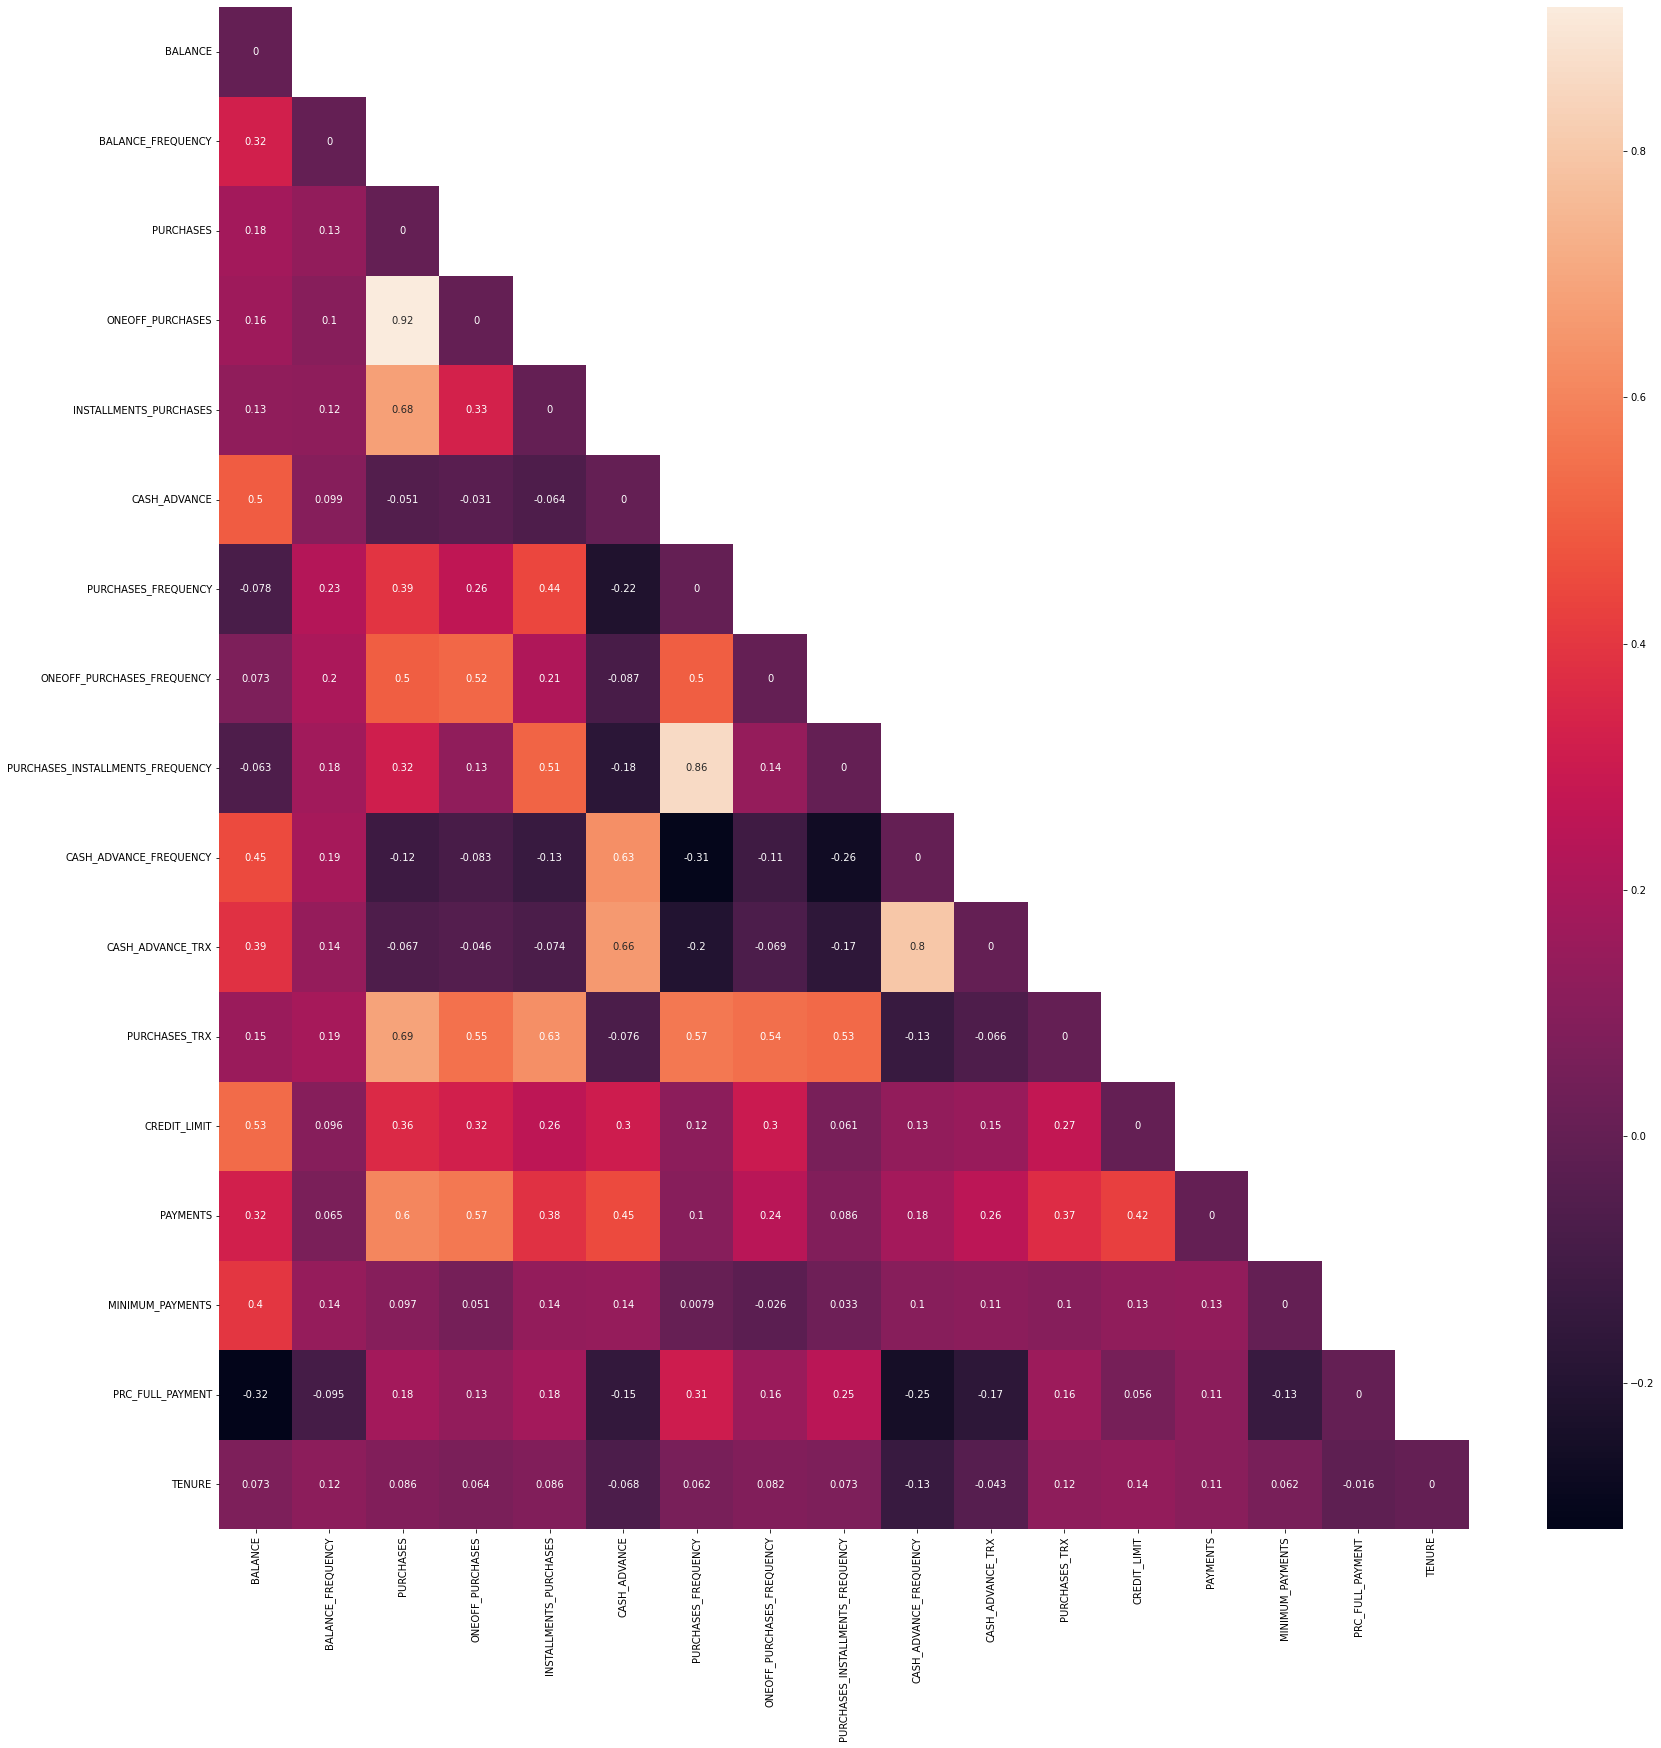

In [109]:
plt.subplots(figsize=(28,28))
matrix = np.triu(corr_mat)
sns_plot = sns.heatmap(corr_mat,annot=True,mask=matrix)
fig = sns_plot.get_figure()

In [110]:
corr_mat.abs().max().sort_values(ascending=False)

PURCHASES                           0.916845
ONEOFF_PURCHASES                    0.916845
PURCHASES_INSTALLMENTS_FREQUENCY    0.862934
PURCHASES_FREQUENCY                 0.862934
CASH_ADVANCE_FREQUENCY              0.799561
CASH_ADVANCE_TRX                    0.799561
PURCHASES_TRX                       0.689561
INSTALLMENTS_PURCHASES              0.679896
CASH_ADVANCE                        0.656498
PAYMENTS                            0.603264
ONEOFF_PURCHASES_FREQUENCY          0.544869
CREDIT_LIMIT                        0.531324
BALANCE                             0.531324
MINIMUM_PAYMENTS                    0.399642
BALANCE_FREQUENCY                   0.322412
PRC_FULL_PAYMENT                    0.318959
TENURE                              0.139592
dtype: float64

In [111]:
skew_cols = data.skew().sort_values(ascending=False)
skew_cols = skew_cols.loc[skew_cols > 0.75]
print(skew_cols)

MINIMUM_PAYMENTS              13.808430
ONEOFF_PURCHASES              10.045083
PURCHASES                      8.144269
INSTALLMENTS_PURCHASES         7.299120
PAYMENTS                       5.907620
CASH_ADVANCE_TRX               5.721298
CASH_ADVANCE                   5.166609
PURCHASES_TRX                  4.630655
BALANCE                        2.393386
PRC_FULL_PAYMENT               1.942820
CASH_ADVANCE_FREQUENCY         1.828686
ONEOFF_PURCHASES_FREQUENCY     1.535613
CREDIT_LIMIT                   1.522363
dtype: float64


In [112]:
for col in skew_cols.index.tolist():
    data[col] = np.log1p(data[col])

In [113]:
s = StandardScaler()
data = s.fit_transform(data)
data = pd.DataFrame(data, columns=corr_mat.columns)
data

#We can see how the data is now on the same scale. 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205218,-0.249434,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.732480,-0.707313,-0.724360,-0.810069,-0.579510,-1.438256,-0.824484,-0.481957,-0.556368,0.360680
1,0.948918,0.134325,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.732480,-0.916995,0.699592,0.784603,-1.379210,0.922141,1.065033,0.791014,0.391958,0.360680
2,0.824993,0.518084,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.466762,-0.916995,-0.724360,-0.810069,0.487865,1.005855,-0.119300,0.455727,-0.556368,0.360680
3,0.624653,-1.016953,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.363042,-0.916995,-0.213583,-0.123281,-0.874655,1.005855,-4.161996,-3.578076,-0.556368,0.360680
4,0.271260,0.518084,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.363042,-0.916995,-0.724360,-0.810069,-0.874655,-1.217204,-0.064979,-0.131852,-0.556368,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.379634,0.518084,0.266574,-0.987090,0.754107,-0.930733,1.269843,-0.732480,1.179833,-0.724360,-0.810069,0.037255,-1.438256,-0.525121,-1.130277,1.359774,-4.122768
8946,-1.568051,0.518084,0.276841,-0.987090,0.763821,-0.930733,1.269843,-0.732480,1.179833,-0.724360,-0.810069,0.037255,-1.438256,-0.628912,-3.578076,-0.556368,-4.122768
8947,-1.473834,-0.185477,0.027374,-0.987090,0.527794,-0.930733,0.854576,-0.732480,0.760469,-0.724360,-0.810069,-0.074955,-1.438256,-1.391318,-0.808399,0.498161,-4.122768
8948,-1.733775,-0.185477,-1.679855,-0.987090,-1.087454,0.086038,-1.221758,-0.732480,-0.916995,0.259328,0.278464,-1.379210,-2.278205,-1.661097,-1.049509,0.498161,-4.122768


In [114]:
# function to visualize identified clusters

def visualize_clusters(*, df, labels_all, hyperparam_name, hyperparam_val, noise_exist):
    """Visualisation of identified clusters. Only a single hyperparameter is considered.
    
    Arguments
    =========
    df: pandas.DataFrame
        Dataframe of input features.
    labels_all: list | numpy.array
        Identified cluster IDs.
    hyperparam_name: str | None
        Name of hyperparameter.
    hyperparam_val: float | int | None
        Value of hyperparameter.
    noise_exist: bool
        True if algo models noise, False otherwise.
        Assumes encoding of noise as cluster ID = -1.
        
    Returns
    =======
    None 
    Prints a figure.
    
    """
    
    # Checking of input parameters omitted for this notebook 
    
    labels = sorted(pd.Series(labels_all).unique())
    
    if noise_exist:

        outlier_perc = int(round(( (len(df) - sum(np.where(labels_all == -1, False, True))) / len(df) ) * 100, 0))

        plt.figure(figsize=std_figure_size)
        for label in labels:
            if label == -1:
                marker_style = "*"
            else:
                marker_style = "o"
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label), marker=marker_style)
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}; 'Noise': {outlier_perc}%")
        else:
            plt.title(f"Defaults for all hyperparameters; 'Noise': {outlier_perc}%")
        plt.legend(title="cluster ID")
        plt.show()
        
    else:
        
        plt.figure(figsize=std_figure_size)
        for label in labels:
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label))
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}")
        else:
            plt.title(f"Defaults for all hyperparameters")
        plt.legend(title="cluster ID")
        plt.show()
        

def convergence_check(model):
    """Checking if fitted model converged within the max. number of iterations."""
    if model.n_iter_ < model.max_iter:
        print(f"Algorithm converged successfully!\nn_iter: {model.n_iter_}, max_iter: {model.max_iter}\n")
    else:
        print(f"WARNING: Algorithm did not converge within {model.max_iter} iterations!\n")

Default values for all parameters and see the results. dampingfloat, default=0.5. Preferences for each point will be set to the median of the input similarities.

In [115]:
import random
import time
fixed_random_state = random.seed(42)

In [116]:
affprop = AffinityPropagation(random_state=fixed_random_state).fit(data)

convergence_check(affprop)

Algorithm converged successfully!
n_iter: 71, max_iter: 200



In [117]:
cluster_centers_indices = affprop.cluster_centers_indices_
labels = affprop.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)

from sklearn import metrics

def evaluate_clustering(labels, data):
# Calculate Silhouette score
    silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')

    # Calculate Davies-Bouldin Index
    davies_bouldin_index = metrics.davies_bouldin_score(data, labels)

    # Calculate Calinski-Harabasz Index
    calinski_harabasz_index = metrics.calinski_harabasz_score(data, labels)

    return silhouette_score, davies_bouldin_index, calinski_harabasz_index


affprop_silhouette, affprop_davies_bouldin, affprop_calinski_harabasz = evaluate_clustering(labels, data)

print("Affinity Propagation Silhouette score: %0.3f" %  affprop_silhouette)
print("Affinity Propagation Davies-Bouldin Index: %0.3f" %  affprop_davies_bouldin)
print("Affinity Propagation Calinski-Harabasz Index: %0.3f" %  affprop_calinski_harabasz)



Estimated number of clusters: 237
Affinity Propagation Silhouette score: 0.135
Affinity Propagation Davies-Bouldin Index: 1.556
Affinity Propagation Calinski-Harabasz Index: 312.986


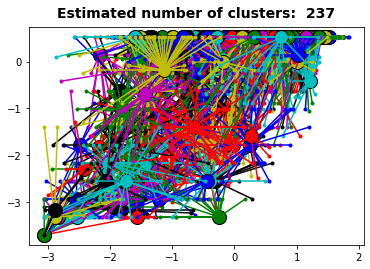

In [59]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
  
plt.close('all')
plt.figure(1)
plt.clf()
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = data.to_numpy()[cluster_centers_indices[k]]
    plt.plot(data.to_numpy()[class_members, 0], data.to_numpy()[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)
  
    for x in data.to_numpy()[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)
  
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()

In [118]:
# Count the number of members in each cluster
unique_labels, cluster_counts = np.unique(labels, return_counts=True)

# Print the results
for label, count in zip(unique_labels, cluster_counts):
    print(f"Cluster {label}: {count} members")

Cluster 0: 8 members
Cluster 1: 53 members
Cluster 2: 60 members
Cluster 3: 50 members
Cluster 4: 14 members
Cluster 5: 56 members
Cluster 6: 17 members
Cluster 7: 18 members
Cluster 8: 16 members
Cluster 9: 30 members
Cluster 10: 15 members
Cluster 11: 34 members
Cluster 12: 47 members
Cluster 13: 24 members
Cluster 14: 17 members
Cluster 15: 54 members
Cluster 16: 58 members
Cluster 17: 11 members
Cluster 18: 4 members
Cluster 19: 19 members
Cluster 20: 13 members
Cluster 21: 14 members
Cluster 22: 17 members
Cluster 23: 27 members
Cluster 24: 6 members
Cluster 25: 7 members
Cluster 26: 38 members
Cluster 27: 37 members
Cluster 28: 32 members
Cluster 29: 46 members
Cluster 30: 129 members
Cluster 31: 40 members
Cluster 32: 15 members
Cluster 33: 16 members
Cluster 34: 44 members
Cluster 35: 35 members
Cluster 36: 39 members
Cluster 37: 16 members
Cluster 38: 49 members
Cluster 39: 47 members
Cluster 40: 41 members
Cluster 41: 33 members
Cluster 42: 39 members
Cluster 43: 38 members
C

In [119]:
# Print the minimum, maximum, and variance in cluster size
min_cluster_size = np.min(cluster_counts)
max_cluster_size = np.max(cluster_counts)
variance_cluster_size = np.var(cluster_counts)
avg_cluster_size = np.mean(cluster_counts)

print(f"Minimum cluster size: {min_cluster_size}")
print(f"Maximum cluster size: {max_cluster_size}")
print(f"Variance in cluster size: {variance_cluster_size}")
print(f"Average in cluster size: {avg_cluster_size}")

Minimum cluster size: 1
Maximum cluster size: 136
Variance in cluster size: 606.0876284071285
Average in cluster size: 37.76371308016878


From the information above, we can see that the number of members vary for each clusters, ranging from 1 to 136 members for a cluster.

Extremely small clusters (e.g., one member) may be indicative of noise or outliers in our data. These single-member clusters might not represent meaningful patterns. It's essential to consider whether these small clusters are genuine or simply the result of noise.

Although Affinity Propagation is a powerful clustering algorithm, it does not have a specific mechanism for handling outliers or noise, unlike a density-based clustering algorithm like DBSCAN, which explicitly identifies noise points as outliers.

Data points can be assigned to clusters based on their similarity to exemplars. Points that are strongly connected to an exemplar will be assigned to the same cluster, while points that are not strongly connected to any exemplar may remain unclustered.

The choice of the damping factor in AP can influence the number of clusters and how tightly or loosely data points are clustered. A higher damping factor can lead to fewer clusters and may result in some data points being classified as noise.

We will be exploring reducing the dimensionality of data using PCA to preserving as much information as possible and to eliminate noise that might be present in high-dimensional spaces.

In [30]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = len(data.columns))
covar_matrix.fit(data)

PCA(n_components=17)

In [40]:
PCAmoduse = PCA(n_components=2)
data_new = PCAmoduse.fit_transform(data)

data_new = pd.DataFrame(data_new, columns = ['col' + str(x) for x in range(1,3)])
data_new
data_numpy = data_new.to_numpy()
data_numpy

array([[-0.40031779,  2.53245962],
       [-3.39102619, -1.16605455],
       [ 1.5685202 , -1.20383134],
       ...,
       [ 0.87499689,  3.10664459],
       [-2.93428951,  3.54804129],
       [-0.21638498,  0.57491216]])

Preference value = -5000.000000 :
Affinity Propagation Silhouette score: 0.564
Algorithm converged successfully!
n_iter: 108, max_iter: 500

Estimated number of clusters: 4
Preference value = -10000.000000 :
Affinity Propagation Silhouette score: 0.594
Algorithm converged successfully!
n_iter: 87, max_iter: 500

Estimated number of clusters: 3
Preference value = -15000.000000 :
Affinity Propagation Silhouette score: 0.593
Algorithm converged successfully!
n_iter: 89, max_iter: 500

Estimated number of clusters: 3
Preference value = -20000.000000 :
Affinity Propagation Silhouette score: 0.583
Algorithm converged successfully!
n_iter: 106, max_iter: 500

Estimated number of clusters: 2


,preference,clusters,sil_score
1,-10000.0,3.0,0.593535
2,-15000.0,3.0,0.592782
3,-20000.0,2.0,0.582565
0,-5000.0,4.0,0.564018


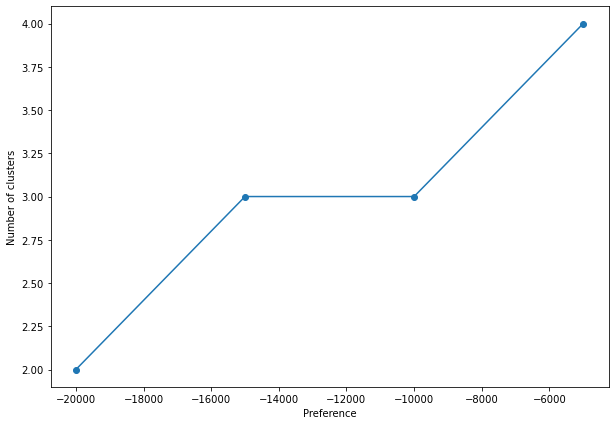

In [52]:
from sklearn.metrics import silhouette_score

preferences = np.arange(-5000,-23000,-5000)
clusters = []
af_sil_score = [] # silouette scores
##https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap

for p in preferences:
    try:
        print("Preference value = %f :" % p)
        af = AffinityPropagation(preference=p, damping=0.95, max_iter=500, random_state=fixed_random_state).fit(data_numpy)
        labels_af = pd.DataFrame(af.labels_)
        clusters.append(len(af.cluster_centers_indices_))
        silhouette_score = metrics.silhouette_score(data_numpy, af.labels_, metric='sqeuclidean')
        print("Affinity Propagation Silhouette score: %0.3f" %  silhouette_score)
        af_sil_score.append(silhouette_score)
        convergence_check(af)
        cluster_centers_indices = af.cluster_centers_indices_
        labels = af.labels_
        n_clusters_ = len(cluster_centers_indices)
        print("Estimated number of clusters: %d" % n_clusters_)
        
    except ValueError as e:
            # Handle the ValueError exception
            print("ValueError:", e)
            
        

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')

##Insight: As the preferences parameter goes down so does the number of clusters.
##Insight: The minimum is attained for 5 clusters at -160. As such I will check the 5 clusters option

af_results = pd.DataFrame([preferences, clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

In [54]:
af = AffinityPropagation(preference=-10000, damping=0.95, max_iter=500, random_state=fixed_random_state).fit(data_numpy)

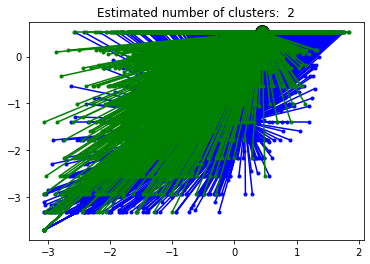

In [59]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle
  
plt.close('all')
plt.figure(1)
plt.clf()
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = data.to_numpy()[cluster_centers_indices[k]]
    plt.plot(data.to_numpy()[class_members, 0], data.to_numpy()[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)
  
    for x in data.to_numpy()[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)
  
plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()

In [64]:
def evaluate_clustering(labels, data):
    # Calculate Silhouette score
    silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')

    # Calculate Davies-Bouldin Index
    davies_bouldin_index = metrics.davies_bouldin_score(data, labels)

    # Calculate Calinski-Harabasz Index
    calinski_harabasz_index = metrics.calinski_harabasz_score(data, labels)

    return silhouette_score, davies_bouldin_index, calinski_harabasz_index


affprop_silhouette, affprop_davies_bouldin, affprop_calinski_harabasz = evaluate_clustering(labels, data)

print("Affinity Propagation Silhouette score: %0.3f" %  affprop_silhouette)
print("Affinity Propagation Davies-Bouldin Index: %0.3f" %  affprop_davies_bouldin)
print("Affinity Propagation Calinski-Harabasz Index: %0.3f" %  affprop_calinski_harabasz)

Affinity Propagation Silhouette score: 0.249
Affinity Propagation Davies-Bouldin Index: 1.592
Affinity Propagation Calinski-Harabasz Index: 3019.077


In [78]:
# Count the number of members in each cluster
unique_labels, cluster_counts = np.unique(labels, return_counts=True)

# Print the results
for label, count in zip(unique_labels, cluster_counts):
    print(f"Cluster {label}: {count} members")


Cluster 0: 3700 members
Cluster 1: 5250 members


In [98]:
unique_labels

array([0, 1], dtype=int64)

In [100]:
import numpy as np

# Assuming 'data' is your dataset
for label in unique_labels:
    cluster_data = mapdata[labels == label]
    mean_features = np.mean(cluster_data, axis=0)
    std_features = np.std(cluster_data, axis=0)
    print(f"Cluster {label}: {cluster_counts[label]} members")
    print(f"Mean Features: {mean_features}")

Cluster 0: 3700 members
Mean Features: BALANCE                             2054.731197
BALANCE_FREQUENCY                      0.862648
PURCHASES                            163.806992
ONEOFF_PURCHASES                     133.504522
INSTALLMENTS_PURCHASES                30.416108
CASH_ADVANCE                        1825.155758
PURCHASES_FREQUENCY                    0.104350
ONEOFF_PURCHASES_FREQUENCY             0.058851
PURCHASES_INSTALLMENTS_FREQUENCY       0.043261
CASH_ADVANCE_FREQUENCY                 0.252226
CASH_ADVANCE_TRX                       6.076757
PURCHASES_TRX                          1.725135
CREDIT_LIMIT                        4107.987715
PAYMENTS                            1586.026944
MINIMUM_PAYMENTS                     941.521173
PRC_FULL_PAYMENT                       0.036911
TENURE                                11.325135
dtype: float64
Cluster 1: 5250 members
Mean Features: BALANCE                             1218.960815
BALANCE_FREQUENCY                      0.88

Observation of results of different parameters and possible pca:

In [41]:
prefs = [-100, -150, -200, -250, -300, -350, -400, -500, -1000, -1500, -2000, -2500, -3000, -3500, -4000, -5000, -6000]
for pca in range(2,15):
    print("PCA = %d :" % pca)
    PCAmoduse = PCA(n_components=pca)
    data_new = PCAmoduse.fit_transform(data)

    data_new = pd.DataFrame(data_new, columns = ['col' + str(x) for x in range(1,pca+1)])
    data_numpy = data_new.to_numpy()
    
    for p in prefs:
        print("Preference value = %f :" % p)
        try:
            affprop = AffinityPropagation(damping=0.95, preference=p , max_iter=500, random_state=fixed_random_state)
            labels_4 = affprop.fit_predict(data_numpy)
            convergence_check(affprop)
            cluster_centers_indices = affprop.cluster_centers_indices_
            labels = affprop.labels_
            n_clusters_ = len(cluster_centers_indices)
        
            
            print("Estimated number of clusters: %d" % n_clusters_)

            from sklearn import metrics

            def evaluate_clustering(labels, data):
            # Calculate Silhouette score
                silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')

                # Calculate Davies-Bouldin Index
                davies_bouldin_index = metrics.davies_bouldin_score(data, labels)

                # Calculate Calinski-Harabasz Index
                calinski_harabasz_index = metrics.calinski_harabasz_score(data, labels)

                return silhouette_score, davies_bouldin_index, calinski_harabasz_index


            affprop_silhouette, affprop_davies_bouldin, affprop_calinski_harabasz = evaluate_clustering(labels, data)

            print("Affinity Propagation Silhouette score: %0.3f" %  affprop_silhouette)
            print("Affinity Propagation Davies-Bouldin Index: %0.3f" %  affprop_davies_bouldin)
            print("Affinity Propagation Calinski-Harabasz Index: %0.3f" %  affprop_calinski_harabasz)



        except ValueError as e:
            # Handle the ValueError exception
            print("ValueError:", e)
            print("Estimated number of clusters: %d" % n_clusters_)
/
        print("/n")


PCA = 2 :
Preference value = -100.000000 :
Algorithm converged successfully!
n_iter: 105, max_iter: 500

Estimated number of clusters: 33
Affinity Propagation Silhouette score: 0.034
Affinity Propagation Davies-Bouldin Index: 3.085
Affinity Propagation Calinski-Harabasz Index: 502.127
/n
Preference value = -150.000000 :
Algorithm converged successfully!
n_iter: 120, max_iter: 500

Estimated number of clusters: 26
Affinity Propagation Silhouette score: 0.055
Affinity Propagation Davies-Bouldin Index: 2.713
Affinity Propagation Calinski-Harabasz Index: 615.646
/n
Preference value = -200.000000 :
Algorithm converged successfully!
n_iter: 98, max_iter: 500

Estimated number of clusters: 23
Affinity Propagation Silhouette score: 0.067
Affinity Propagation Davies-Bouldin Index: 2.716
Affinity Propagation Calinski-Harabasz Index: 678.545
/n
Preference value = -250.000000 :
Algorithm converged successfully!
n_iter: 96, max_iter: 500

Estimated number of clusters: 21
Affinity Propagation Silhou

Affinity Propagation Silhouette score: 0.227
Affinity Propagation Davies-Bouldin Index: 1.465
Affinity Propagation Calinski-Harabasz Index: 2042.066
/n
Preference value = -3500.000000 :
Algorithm converged successfully!
n_iter: 89, max_iter: 500

Estimated number of clusters: 6
Affinity Propagation Silhouette score: 0.227
Affinity Propagation Davies-Bouldin Index: 1.459
Affinity Propagation Calinski-Harabasz Index: 2038.773
/n
Preference value = -4000.000000 :
Algorithm converged successfully!
n_iter: 92, max_iter: 500

Estimated number of clusters: 6
Affinity Propagation Silhouette score: 0.227
Affinity Propagation Davies-Bouldin Index: 1.469
Affinity Propagation Calinski-Harabasz Index: 2041.412
/n
Preference value = -5000.000000 :
Algorithm converged successfully!
n_iter: 128, max_iter: 500

Estimated number of clusters: 5
Affinity Propagation Silhouette score: 0.220
Affinity Propagation Davies-Bouldin Index: 1.604
Affinity Propagation Calinski-Harabasz Index: 2086.834
/n
Preference

Algorithm converged successfully!
n_iter: 88, max_iter: 500

Estimated number of clusters: 16
Affinity Propagation Silhouette score: 0.171
Affinity Propagation Davies-Bouldin Index: 1.630
Affinity Propagation Calinski-Harabasz Index: 1225.070
/n
Preference value = -1500.000000 :
Algorithm converged successfully!
n_iter: 100, max_iter: 500

Estimated number of clusters: 13
Affinity Propagation Silhouette score: 0.178
Affinity Propagation Davies-Bouldin Index: 1.640
Affinity Propagation Calinski-Harabasz Index: 1341.757
/n
Preference value = -2000.000000 :
Algorithm converged successfully!
n_iter: 77, max_iter: 500

Estimated number of clusters: 11
Affinity Propagation Silhouette score: 0.170
Affinity Propagation Davies-Bouldin Index: 1.702
Affinity Propagation Calinski-Harabasz Index: 1439.544
/n
Preference value = -2500.000000 :
Algorithm converged successfully!
n_iter: 66, max_iter: 500

Estimated number of clusters: 8
Affinity Propagation Silhouette score: 0.201
Affinity Propagation 

Affinity Propagation Silhouette score: 0.167
Affinity Propagation Davies-Bouldin Index: 1.591
Affinity Propagation Calinski-Harabasz Index: 800.489
/n
Preference value = -300.000000 :
Algorithm converged successfully!
n_iter: 97, max_iter: 500

Estimated number of clusters: 40
Affinity Propagation Silhouette score: 0.169
Affinity Propagation Davies-Bouldin Index: 1.561
Affinity Propagation Calinski-Harabasz Index: 841.453
/n
Preference value = -350.000000 :
Algorithm converged successfully!
n_iter: 113, max_iter: 500

Estimated number of clusters: 36
Affinity Propagation Silhouette score: 0.175
Affinity Propagation Davies-Bouldin Index: 1.541
Affinity Propagation Calinski-Harabasz Index: 872.806
/n
Preference value = -400.000000 :
Algorithm converged successfully!
n_iter: 106, max_iter: 500

Estimated number of clusters: 31
Affinity Propagation Silhouette score: 0.174
Affinity Propagation Davies-Bouldin Index: 1.529
Affinity Propagation Calinski-Harabasz Index: 956.861
/n
Preference va

Algorithm converged successfully!
n_iter: 69, max_iter: 500

Estimated number of clusters: 6
Affinity Propagation Silhouette score: 0.228
Affinity Propagation Davies-Bouldin Index: 1.433
Affinity Propagation Calinski-Harabasz Index: 2062.049
/n
PCA = 9 :
Preference value = -100.000000 :
Algorithm converged successfully!
n_iter: 125, max_iter: 500

Estimated number of clusters: 84
Affinity Propagation Silhouette score: 0.153
Affinity Propagation Davies-Bouldin Index: 1.589
Affinity Propagation Calinski-Harabasz Index: 564.433
/n
Preference value = -150.000000 :
Algorithm converged successfully!
n_iter: 151, max_iter: 500

Estimated number of clusters: 64
Affinity Propagation Silhouette score: 0.157
Affinity Propagation Davies-Bouldin Index: 1.568
Affinity Propagation Calinski-Harabasz Index: 662.641
/n
Preference value = -200.000000 :
Algorithm converged successfully!
n_iter: 101, max_iter: 500

Estimated number of clusters: 56
Affinity Propagation Silhouette score: 0.162
Affinity Propa

Affinity Propagation Silhouette score: 0.203
Affinity Propagation Davies-Bouldin Index: 1.508
Affinity Propagation Calinski-Harabasz Index: 1559.391
/n
Preference value = -3000.000000 :
Algorithm converged successfully!
n_iter: 92, max_iter: 500

Estimated number of clusters: 9
Affinity Propagation Silhouette score: 0.221
Affinity Propagation Davies-Bouldin Index: 1.470
Affinity Propagation Calinski-Harabasz Index: 1670.199
/n
Preference value = -3500.000000 :
Algorithm converged successfully!
n_iter: 85, max_iter: 500

Estimated number of clusters: 7
Affinity Propagation Silhouette score: 0.212
Affinity Propagation Davies-Bouldin Index: 1.520
Affinity Propagation Calinski-Harabasz Index: 1856.724
/n
Preference value = -4000.000000 :
Algorithm converged successfully!
n_iter: 88, max_iter: 500

Estimated number of clusters: 6
Affinity Propagation Silhouette score: 0.226
Affinity Propagation Davies-Bouldin Index: 1.444
Affinity Propagation Calinski-Harabasz Index: 2065.140
/n
Preference 

Algorithm converged successfully!
n_iter: 95, max_iter: 500

Estimated number of clusters: 35
Affinity Propagation Silhouette score: 0.180
Affinity Propagation Davies-Bouldin Index: 1.531
Affinity Propagation Calinski-Harabasz Index: 911.210
/n
Preference value = -1000.000000 :
Algorithm converged successfully!
n_iter: 84, max_iter: 500

Estimated number of clusters: 21
Affinity Propagation Silhouette score: 0.188
Affinity Propagation Davies-Bouldin Index: 1.551
Affinity Propagation Calinski-Harabasz Index: 1171.179
/n
Preference value = -1500.000000 :
Algorithm converged successfully!
n_iter: 81, max_iter: 500

Estimated number of clusters: 16
Affinity Propagation Silhouette score: 0.193
Affinity Propagation Davies-Bouldin Index: 1.558
Affinity Propagation Calinski-Harabasz Index: 1321.145
/n
Preference value = -2000.000000 :
Algorithm converged successfully!
n_iter: 86, max_iter: 500

Estimated number of clusters: 14
Affinity Propagation Silhouette score: 0.188
Affinity Propagation D

Affinity Propagation Silhouette score: 0.156
Affinity Propagation Davies-Bouldin Index: 1.604
Affinity Propagation Calinski-Harabasz Index: 687.571
/n
Preference value = -250.000000 :
Algorithm converged successfully!
n_iter: 95, max_iter: 500

Estimated number of clusters: 54
Affinity Propagation Silhouette score: 0.162
Affinity Propagation Davies-Bouldin Index: 1.604
Affinity Propagation Calinski-Harabasz Index: 728.387
/n
Preference value = -300.000000 :
Algorithm converged successfully!
n_iter: 123, max_iter: 500

Estimated number of clusters: 47
Affinity Propagation Silhouette score: 0.172
Affinity Propagation Davies-Bouldin Index: 1.573
Affinity Propagation Calinski-Harabasz Index: 786.448
/n
Preference value = -350.000000 :
Algorithm converged successfully!
n_iter: 103, max_iter: 500

Estimated number of clusters: 43
Affinity Propagation Silhouette score: 0.173
Affinity Propagation Davies-Bouldin Index: 1.583
Affinity Propagation Calinski-Harabasz Index: 821.347
/n
Preference va

In [38]:
prefs = [-24000]
for pca in range(2,15):
    print("PCA = %d :" % pca)
    PCAmoduse = PCA(n_components=pca)
    data_new = PCAmoduse.fit_transform(data)

    data_new = pd.DataFrame(data_new, columns = ['col' + str(x) for x in range(1,pca+1)])
    data_numpy = data_new.to_numpy()
    
    for p in prefs:
        print("Preference value = %f :" % p)
        try:
            affprop = AffinityPropagation(damping=0.95, preference=p , max_iter=500, random_state=fixed_random_state)
            labels_4 = affprop.fit_predict(data_numpy)
            convergence_check(affprop)
            cluster_centers_indices = affprop.cluster_centers_indices_
            labels = affprop.labels_
            n_clusters_ = len(cluster_centers_indices)
        
            
            print("Estimated number of clusters: %d" % n_clusters_)

            from sklearn import metrics

            def evaluate_clustering(labels, data):
            # Calculate Silhouette score
                silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')

                # Calculate Davies-Bouldin Index
                davies_bouldin_index = metrics.davies_bouldin_score(data, labels)

                # Calculate Calinski-Harabasz Index
                calinski_harabasz_index = metrics.calinski_harabasz_score(data, labels)

                return silhouette_score, davies_bouldin_index, calinski_harabasz_index


            affprop_silhouette, affprop_davies_bouldin, affprop_calinski_harabasz = evaluate_clustering(labels, data)

            print("Affinity Propagation Silhouette score: %0.3f" %  affprop_silhouette)
            print("Affinity Propagation Davies-Bouldin Index: %0.3f" %  affprop_davies_bouldin)
            print("Affinity Propagation Calinski-Harabasz Index: %0.3f" %  affprop_calinski_harabasz)



        except ValueError as e:
            # Handle the ValueError exception
            print("ValueError:", e)
            print("Estimated number of clusters: %d" % n_clusters_)

        print("/n")


PCA = 2 :
Preference value = -24000.000000 :
Algorithm converged successfully!
n_iter: 81, max_iter: 500

Estimated number of clusters: 2
Affinity Propagation Silhouette score: 0.246
Affinity Propagation Davies-Bouldin Index: 1.616
Affinity Propagation Calinski-Harabasz Index: 2996.288
/n
PCA = 3 :
Preference value = -24000.000000 :
Algorithm converged successfully!
n_iter: 86, max_iter: 500

Estimated number of clusters: 1
ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Estimated number of clusters: 1
/n
PCA = 4 :
Preference value = -24000.000000 :
Algorithm converged successfully!
n_iter: 75, max_iter: 500

Estimated number of clusters: 2
Affinity Propagation Silhouette score: 0.257
Affinity Propagation Davies-Bouldin Index: 1.462
Affinity Propagation Calinski-Harabasz Index: 3080.201
/n
PCA = 5 :
Preference value = -24000.000000 :
Algorithm converged successfully!
n_iter: 71, max_iter: 500

Estimated number of clusters: 2
Affinity Propagation Silho

below shows that preference of below -25000 yields a cluster size of 1 for PCA = 2

In [122]:
prefs = [-25000]
for pca in range(2,15):
    print("PCA = %d :" % pca)
    PCAmoduse = PCA(n_components=pca)
    data_new = PCAmoduse.fit_transform(data)

    data_new = pd.DataFrame(data_new, columns = ['col' + str(x) for x in range(1,pca+1)])
    data_numpy = data_new.to_numpy()
    
    for p in prefs:
        print("Preference value = %f :" % p)
        try:
            affprop = AffinityPropagation(damping=0.95, preference=p , max_iter=500, random_state=fixed_random_state)
            labels_4 = affprop.fit_predict(data_numpy)
            convergence_check(affprop)
            cluster_centers_indices = affprop.cluster_centers_indices_
            labels = affprop.labels_
            n_clusters_ = len(cluster_centers_indices)
        
            
            print("Estimated number of clusters: %d" % n_clusters_)

            from sklearn import metrics

            def evaluate_clustering(labels, data):
            # Calculate Silhouette score
                silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')

                # Calculate Davies-Bouldin Index
                davies_bouldin_index = metrics.davies_bouldin_score(data, labels)

                # Calculate Calinski-Harabasz Index
                calinski_harabasz_index = metrics.calinski_harabasz_score(data, labels)

                return silhouette_score, davies_bouldin_index, calinski_harabasz_index


            affprop_silhouette, affprop_davies_bouldin, affprop_calinski_harabasz = evaluate_clustering(labels, data)

            print("Affinity Propagation Silhouette score: %0.3f" %  affprop_silhouette)
            print("Affinity Propagation Davies-Bouldin Index: %0.3f" %  affprop_davies_bouldin)
            print("Affinity Propagation Calinski-Harabasz Index: %0.3f" %  affprop_calinski_harabasz)



        except ValueError as e:
            # Handle the ValueError exception
            print("ValueError:", e)
            print("Estimated number of clusters: %d" % n_clusters_)

        print("/n")


PCA = 2 :
Preference value = -25000.000000 :
Algorithm converged successfully!
n_iter: 78, max_iter: 500

Estimated number of clusters: 1
ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Estimated number of clusters: 1
/n
PCA = 3 :
Preference value = -25000.000000 :
Algorithm converged successfully!
n_iter: 74, max_iter: 500

Estimated number of clusters: 1
ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Estimated number of clusters: 1
/n
PCA = 4 :
Preference value = -25000.000000 :
Algorithm converged successfully!
n_iter: 89, max_iter: 500

Estimated number of clusters: 1
ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Estimated number of clusters: 1
/n
PCA = 5 :
Preference value = -25000.000000 :
Algorithm converged successfully!
n_iter: 72, max_iter: 500

Estimated number of clusters: 2
Affinity Propagation Silhouette score: 0.240
Affinity Propagation Davies-Bouldin Index: 1.651
